### Naive Bayes and Feature Engineering for Default Loan Forecasting

Dataset: https://www.kaggle.com/datasets/itssuru/loan-data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

#### Data Preparation

In [2]:
data=pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#Converts 'purpose' attribute to one hot encoding (it adds new columns).
#Now each category of 'purpose' is a column with values 0 or 1.
data = pd.get_dummies(data, prefix='purpose', prefix_sep='_')
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [4]:
data.mean()

credit.policy                     0.804970
int.rate                          0.122640
installment                     319.089413
log.annual.inc                   10.932117
dti                              12.606679
fico                            710.846314
days.with.cr.line              4560.767197
revol.bal                     16913.963876
revol.util                       46.799236
inq.last.6mths                    1.577469
delinq.2yrs                       0.163708
pub.rec                           0.062122
not.fully.paid                    0.160054
purpose_all_other                 0.243370
purpose_credit_card               0.131760
purpose_debt_consolidation        0.413134
purpose_educational               0.035811
purpose_home_improvement          0.065671
purpose_major_purchase            0.045625
purpose_small_business            0.064627
dtype: float64

#### Navive Bayes Classification

In [5]:
X= data.drop('not.fully.paid', axis=1)
y= data['not.fully.paid']

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.33, random_state=125
)

#Set model
model= GaussianNB()
model.fit(X_train, y_train)
#Make predictions
y_pred= model.predict(X_test)


accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, pos_label=1)
f1= f1_score(y_test, y_pred, average="weighted")
recall= recall_score(y_test, y_pred, pos_label=1)


print("Accuracy:",accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("f1:", f1)

Accuracy: 0.8206263840556786
Recall: 0.09328358208955224
Precision: 0.3816793893129771
f1: 0.7725920701100305


#### Feature Engineering

The goal is to delete features mantaining recall>=0.25

In [6]:
idx=['none','credit.policy','int.rate','installment','log.annual.inc','dti','fico',
    'days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','purpose']

metrics= pd.DataFrame({'accuracy':[accuracy]+[None]*13, 'recall':[recall]+[None]*13, 'precision':[precision]+[None]*13,'f1-score':[f1]+[None]*13},
                    index=idx)
metrics.index.name='col. eliminated'
metrics

,accuracy,recall,precision,f1-score
col. eliminated,,,,
none,0.820626,0.093284,0.381679,0.772592
credit.policy,NaN,NaN,NaN,NaN
int.rate,NaN,NaN,NaN,NaN
installment,NaN,NaN,NaN,NaN
log.annual.inc,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN
fico,NaN,NaN,NaN,NaN
days.with.cr.line,NaN,NaN,NaN,NaN
revol.bal,NaN,NaN,NaN,NaN


In [7]:
purposes=['purpose_debt_consolidation','purpose_all_other','purpose_credit_card',
        'purpose_home_improvement','purpose_small_business',
        'purpose_major_purchase','purpose_educational']

for feature in idx[1:]:

    feat= feature if feature!='purpose' else purposes
    XX_train= X_train.drop(feat, axis=1)
    XX_test= X_test.drop(feat, axis=1)


    #Set model
    model= GaussianNB()
    model.fit(XX_train, y_train)
    #Make predictions
    y_pred= model.predict(XX_test)

    #Compute scores
    scores= np.zeros(4)
    scores[0]= accuracy_score(y_test, y_pred)
    scores[1]= recall_score(y_test, y_pred, pos_label=1)
    scores[2]= precision_score(y_test, y_pred, pos_label=1)
    scores[3]= f1_score(y_test, y_pred, average="weighted")

    #load results
    metrics.loc[feature]= scores


metrics

,accuracy,recall,precision,f1-score
col. eliminated,,,,
none,0.820626,0.093284,0.381679,0.772592
credit.policy,0.819994,0.089552,0.372093,0.771384
int.rate,0.820626,0.093284,0.381679,0.772592
installment,0.820626,0.089552,0.377953,0.771781
log.annual.inc,0.819994,0.093284,0.375940,0.772193
dti,0.820943,0.093284,0.384615,0.772792
fico,0.819994,0.082090,0.363636,0.769736
days.with.cr.line,0.819994,0.091418,0.374046,0.771790
revol.bal,0.756090,0.328358,0.299830,0.760432


In [8]:
#Features that are going to be present
col= ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico'] + purposes

#Features to eliminate:
F1=['days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

F2=[['days.with.cr.line', 'revol.bal'], ['revol.bal', 'revol.util'],['revol.util', 'inq.last.6mths'],
    [ 'inq.last.6mths', 'delinq.2yrs'], ['delinq.2yrs', 'pub.rec'], ['days.with.cr.line','pub.rec'],
    ['revol.bal','inq.last.6mths'],['revol.util','delinq.2yrs',]]

F3=[['days.with.cr.line', 'inq.last.6mths', 'delinq.2yrs'],['revol.bal', 'revol.util', 'pub.rec'],
    ['revol.bal','delinq.2yrs', 'pub.rec'],['days.with.cr.line', 'revol.bal', 'delinq.2yrs']]

F4=[['days.with.cr.line','revol.util','delinq.2yrs', 'pub.rec'],['revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs'],
    ['days.with.cr.line', 'revol.bal', 'inq.last.6mths', 'pub.rec']]

F5=[['days.with.cr.line', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
    ['revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
    ['days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs']]

F6=[['days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']]

F=[F1, F2, F3, F4, F5, F6]

In [9]:
metrics=np.zeros((len(F1)+len(F2)+len(F3)+len(F4)+len(F5)+len(F6),2))

k=0
for f in range(len(F)):
    for feats in F[f]:
        XX_train= X_train.drop(feats, axis=1)
        XX_test= X_test.drop(feats, axis=1)
        #Set model
        model= GaussianNB()
        model.fit(XX_train, y_train)
        #Make predictions
        y_pred= model.predict(XX_test)

        #Compute and load scores
        metrics[k][0]= recall_score(y_test, y_pred, pos_label=1)
        metrics[k][1]= f1_score(y_test, y_pred, average="weighted")
        k+=1


results = {
    'recall' : metrics[:,0],
    'f1-score' : metrics[:,1]
}
results= pd.DataFrame(results, index=F1+F2+F3+F4+F5+F6)
results= results[results['recall']>=0.25].sort_values(by='f1-score', ascending=False)
results

,recall,f1-score
"[revol.bal, revol.util, pub.rec]",0.313433,0.768312
"[revol.bal, delinq.2yrs, pub.rec]",0.319030,0.766986
"[revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec]",0.264925,0.764392
"[revol.bal, revol.util]",0.319030,0.760542
revol.bal,0.328358,0.760432
"[revol.bal, inq.last.6mths]",0.287313,0.759664
"[revol.bal, revol.util, inq.last.6mths, delinq.2yrs]",0.257463,0.757551
"[days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec]",0.311567,0.750720
"[days.with.cr.line, revol.bal, delinq.2yrs]",0.375000,0.749644
"[days.with.cr.line, revol.bal, inq.last.6mths, pub.rec]",0.304104,0.749617


Is possible to delete 6 features and obtain recall>= 0.25

Recall: 0.3283582089552239
f1: 0.7442989698870489


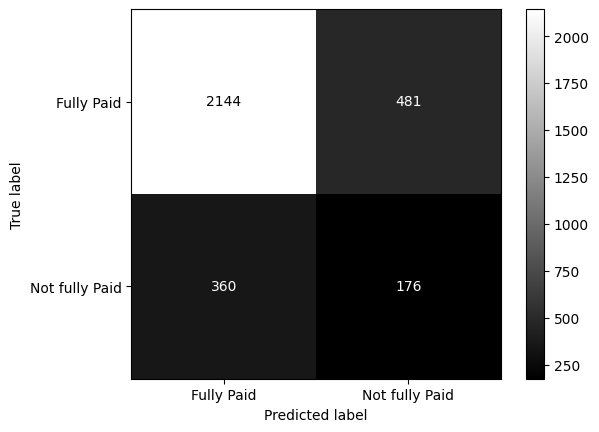

In [10]:
features=['days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs']
X_train= X_train.drop(features, axis=1)
X_test= X_test.drop(features, axis=1)
#Set model
model= GaussianNB()
model.fit(X_train, y_train)
#Make predictions
y_pred= model.predict(X_test)

f1= f1_score(y_test, y_pred, average="weighted")
recall= recall_score(y_test, y_pred, pos_label=1)
print("Recall:", recall)
print("f1:", f1)

labels= ["Fully Paid", "Not fully Paid"]
cm= confusion_matrix(y_test, y_pred)
ConfMtx= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
ConfMtx.plot(cmap='gray')